In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import investpy as ipy
import matplotlib.pyplot as plt

In [2]:
from mpl_finance import candlestick2_ohlc
%matplotlib inline

In [3]:
# -- list of stock
ls = ["0002", "0003", "0005", "0016",
      "0027", "1928", "0066", "0823",
      "0386", "0857", "0388", "0700",
      "0939", "1398", "2318", "0941"]

In [4]:
# -- set start date and end date
start_date = "01/01/2020"
end_date   = dt.date.today().strftime("%d/%m/%Y")

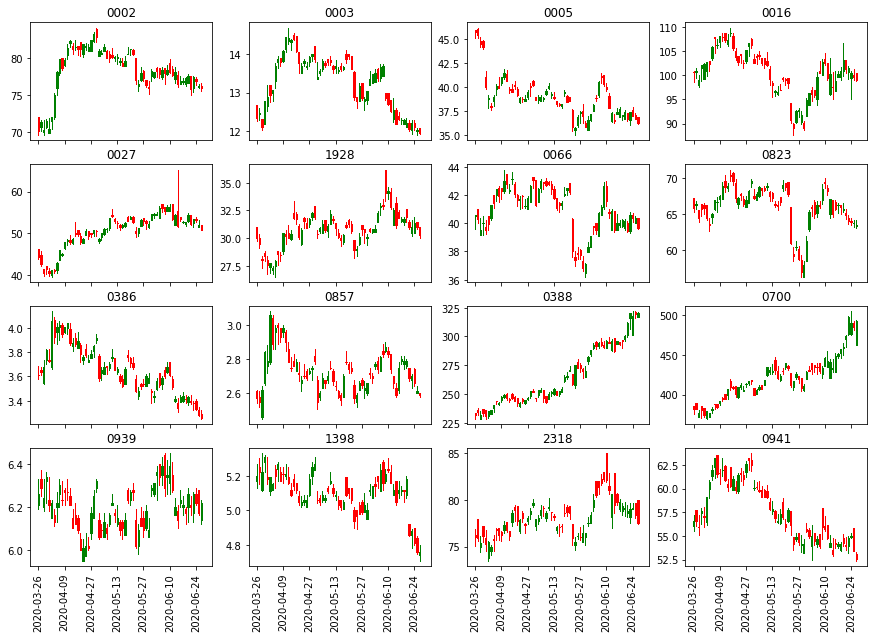

In [5]:
la = []  # -- list of ax

fig = plt.figure(figsize = (15,10))

# -- axis controller
i = 0
j = 0

for s in ls:

    # -- download stock data to dataframe
    df = ipy.get_stock_historical_data(stock=s, country='hong kong', from_date=start_date, to_date=end_date)

    # -- copy 1 quarter data to data, for chart
    data = df.iloc[-63:].copy()

    # -- construct the chart
    la.append(plt.subplot2grid((4,4), (i,j)))

    la[-1].title.set_text(s)
    la[-1].set_xticks(range(0, len(data.index), 10))
    la[-1].set_xticklabels(data.index[::10].strftime("%Y-%m-%d"))

    candlestick2_ohlc(la[-1], opens=data["Open"], highs=data["High"], lows=data["Low"], closes=data["Close"],
                      width=0.5, colorup="green", colordown="red", alpha=1)
    
    j+=1
    
    if i < 3:
        plt.setp(la[-1].get_xticklabels(), visible=False)
    else:
        plt.setp(la[-1].xaxis.get_majorticklabels(), rotation=90)
        
    if j > 3:
        i+=1
        j=0
        
plt.show()